In [2]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# for splitting data into training and holdout dataset
from sklearn.model_selection import train_test_split

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning and dropping stop words
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

# lemmitizing
from nltk.stem import WordNetLemmatizer

# performance check
import time


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sethu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# reading the dataset
# df = pd.read_csv(os.path.join("..", "data", "mbti_unclean.csv"))

from pandas import read_csv

url = './mbti_unclean.csv'
data = pd.read_csv(url)

df = pd.DataFrame(data)

# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)

# saving the training and holdout datasets
personality_data.to_csv('personality_data.csv', index=False)
df_holdout.to_csv('df_holdout.csv', index=False)
              
##################################################################

In [4]:
# reading the dataset that will be used for training and testing the model
personality_data = pd.read_csv('personality_data.csv')

In [5]:
# looking at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFP,'I do too! I think this one will be touching ...
1,INFJ,'we may be known as the most extroverted type ...
2,INTJ,'Yeah god forbid I call him out on mimicking m...
3,INFJ,'Im looking forward to having a few of my own....
4,INFP,'I hope you know that you are my best friend i...


In [6]:
# checking for missing values
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

In [7]:
# to handle the class imbalance better, converting the 16 classes into 4 more balanced classes

personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

# rearranging the dataframe columns
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...
2,INTJ,0,0,1,1,'Yeah god forbid I call him out on mimicking m...
3,INFJ,0,0,0,1,'Im looking forward to having a few of my own....
4,INFP,0,0,0,0,'I hope you know that you are my best friend i...


In [8]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [9]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

In [10]:
personality_data.head()


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...,i do too i think this one will be touching ...
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...,we may be known as the most extroverted type ...
2,INTJ,0,0,1,1,'Yeah god forbid I call him out on mimicking m...,yeah god forbid i call him out on mimicking m...
3,INFJ,0,0,0,1,'Im looking forward to having a few of my own....,im looking forward to having a few of my own ...
4,INFP,0,0,0,0,'I hope you know that you are my best friend i...,i hope you know that you are my best friend i...


In [11]:
# lemmitizing (excluding stop words in this step)

nltk.download('wordnet')

t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)


personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

# checking the cleaned and lemmitized data
personality_data.head() 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sethu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...,think one touching realised kind turn...
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...,may known extroverted type introvert also kno...
2,INTJ,0,0,1,1,'Yeah god forbid I call him out on mimicking m...,yeah god forbid call mimicking never fes per...
3,INFJ,0,0,0,1,'Im looking forward to having a few of my own....,looking forward love niece joy brings famil...
4,INFP,0,0,0,0,'I hope you know that you are my best friend i...,hope know best friend world never met anyone...


In [12]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# feature engineering
import re

# pos tagging
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
!pip install vaderSentiment
# sentiment scoring
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# scaling to handle negative values in sentiment scores (for Naive Bayes)
from sklearn.preprocessing import MinMaxScaler

# performance check
import time


In [13]:
# sentiment scoring for each user
t = time.time()

analyzer = SentimentIntensityAnalyzer()

nlp_sentiment_score = []

for post in personality_data["clean_posts"]:
    score = analyzer.polarity_scores(post)
    nlp_sentiment_score.append(score)

print(f"Sentiment Scoring Time: {time.time() - t:.2f} seconds")

Sentiment Scoring Time: 390.45 seconds


In [14]:
# segregating the indiviual sentiment scores - compound, positive, negative and neutral
personality_data["compound_sentiment"] = [
    score["compound"] for score in nlp_sentiment_score
]
personality_data["pos_sentiment"] = [score["pos"] for score in nlp_sentiment_score]
personality_data["neg_sentiment"] = [score["neg"] for score in nlp_sentiment_score]
personality_data["neu_sentiment"] = [score["neu"] for score in nlp_sentiment_score]

In [15]:
# Sentiment scores have negative values that Naive Bayes can't handle. So scaling it.

min_max_scaler = MinMaxScaler()
personality_data["compound_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["compound_sentiment"]).reshape(-1, 1)
)
personality_data["pos_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["pos_sentiment"]).reshape(-1, 1)
)
personality_data["neg_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neg_sentiment"]).reshape(-1, 1)
)
personality_data["neu_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neu_sentiment"]).reshape(-1, 1)
)

In [16]:
# checking to see if sentiment scores introduced any null value
personality_data.isnull().sum()

type                  0
is_Extrovert          0
is_Sensing            0
is_Thinking           0
is_Judging            0
posts                 0
clean_posts           0
compound_sentiment    0
pos_sentiment         0
neg_sentiment         0
neu_sentiment         0
dtype: int64

In [17]:
# creating tag_posts column that will have each post as a separate list in a row. tag_posts will be a list of 50 lists.

# replacing urls with domain name
personality_data["tag_posts"] = personality_data["posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
    lambda match: match.group(2),
)

# replacing ||| with space
personality_data["tag_posts"] = [
    post for post in personality_data["tag_posts"].str.split("\|\|\|")
]

In [18]:
# parts of speech tagging for each word
t = time.time()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

personality_data["tagged_words"] = personality_data["tag_posts"].apply(
    lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
)

print(f"POS Tagging Time: {time.time() - t} seconds")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sethu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sethu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


POS Tagging Time: 1360.3252913951874 seconds


In [19]:
# creating list of unique POS tags
tag_set = set()

for i, data in personality_data["tagged_words"].iteritems():
    for tup in data[0]:
        tag_set.add(tup[1])

tag_list = list(tag_set)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2273190258.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, data in personality_data["tagged_words"].iteritems():


In [20]:
# calculating mean and standard deviation of pos tags for each user
t = time.time()


def pos_cat(x, tag):
    return [len([y for y in line if y[1] == tag]) for line in x]


for col in tag_list:
    personality_data["POS_" + col + "_mean"] = personality_data["tagged_words"].apply(
        lambda x: np.mean(pos_cat(x, col))
    )
    personality_data["POS_" + col + "_std"] = personality_data["tagged_words"].apply(
        lambda x: np.std(pos_cat(x, col))
    )

print(f"POS Stats Time: {time.time() - t} seconds")

POS Stats Time: 138.1005895137787 seconds


In [21]:
# grouping pos tags based on stanford list
tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}

In [22]:
# Stanford POS tag stats
t = time.time()


def stanford_tag(x, tag):
    tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
    return tags_list


for col in tags_dict.keys():
    personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
        lambda x: np.median(stanford_tag(x, col))
    )

print(f"Stanford POS Stats Time: {time.time() - t} seconds")

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2397153783.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2397153783.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2397153783.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Stanford POS Stats Time: 29.444096565246582 seconds


C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2397153783.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(


In [23]:
# a quick look at the data
personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,NUM_avg,PRT_avg,PRON_avg,VERB_avg,._avg,X_avg
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...,think one touching realised kind turn...,0.992748,0.297333,0.366755,...,2.0,4.0,2.0,5.0,0.0,0.0,4.0,7.0,4.0,0.0
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...,may known extroverted type introvert also kno...,0.999650,0.416000,0.248021,...,2.0,5.0,3.0,9.0,0.0,0.0,3.0,7.0,5.0,0.0


In [24]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# feature engineering
import re
import nltk

# vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# performance check
import time

In [25]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

In [26]:
personality_data["word_count"] = personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1076527448.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["word_count"] = personality_data["posts"].apply(
C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1076527448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["unique_words"] = personality_data["posts"].apply(unique_words)


In [27]:
# stats

t = time.time()

# personality_data["avg_word_ct"] = personality_data["word_count"].apply(lambda s: s / 50)

personality_data["post_length_var"] = personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.2248985767364502


C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1323153256.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["post_length_var"] = personality_data["posts"].apply(


In [28]:
personality_data["upper"] = personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\669604230.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["upper"] = personality_data["posts"].apply(


In [29]:
personality_data["link_count"] = personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2209410155.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["link_count"] = personality_data["posts"].apply(


In [30]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50 for posts in personality_data["posts"]
]
personality_data["ellipses"] = ellipses_count

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1557003147.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["ellipses"] = ellipses_count


In [31]:
personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in personality_data["posts"]
]

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\2026867936.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["img_count"] = [


In [32]:
personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,VERB_avg,._avg,X_avg,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...,think one touching realised kind turn...,0.992748,0.297333,0.366755,...,7.0,4.0,0.0,23.04,11.06,164.410000,0.80,0.18,0.02,0.06
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...,may known extroverted type introvert also kno...,0.999650,0.416000,0.248021,...,7.0,5.0,0.0,25.00,12.14,175.479025,0.18,0.04,0.28,0.02


In [33]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# feature engineering
import re
import nltk

# vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# performance check
import time


In [34]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

In [35]:
personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?") / 50)
personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!") / 50)
personality_data["colons"] = personality_data["posts"].apply(colons)
personality_data["emojis"] = personality_data["posts"].apply(emojis)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1125300314.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?") / 50)
C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1125300314.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!") / 50)
C:\Users\Sethu\AppData\Local\Temp\ipykernel_40268\1125300314.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [36]:
personality_data["word_count"] = personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

In [37]:
# stats

t = time.time()

# personality_data["avg_word_ct"] = personality_data["word_count"].apply(lambda s: s / 50)

personality_data["post_length_var"] = personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.084947109222412


In [38]:
personality_data["upper"] = personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

personality_data["link_count"] = personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50 for posts in personality_data["posts"]
]
personality_data["ellipses"] = ellipses_count

personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in personality_data["posts"]
]


In [39]:
personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,unique_words,post_length_var,upper,link_count,ellipses,img_count,qm,em,colons,emojis
0,INFP,0,0,0,0,'I do too! I think this one will be touching ...,think one touching realised kind turn...,0.992748,0.297333,0.366755,...,11.06,164.410000,0.80,0.18,0.02,0.06,0.32,0.18,0.04,0.02
1,INFJ,0,0,0,1,'we may be known as the most extroverted type ...,may known extroverted type introvert also kno...,0.999650,0.416000,0.248021,...,12.14,175.479025,0.18,0.04,0.28,0.02,0.10,0.12,0.26,0.04


In [40]:
# setting X to clean_posts, compound sentiment score, pos tags and various other counts
X = personality_data[
    [
        "clean_posts",
        "compound_sentiment",
        "ADJ_avg",
        "ADP_avg",
        "ADV_avg",
        "CONJ_avg",
        "DET_avg",
        "NOUN_avg",
        "NUM_avg",
        "PRT_avg",
        "PRON_avg",
        "VERB_avg",
        "qm",
        "em",
        "colons",
        "emojis",
        "word_count",
        "unique_words",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

# setting y to four target classes -> is_Extrovert, is_Sensing, is_Thinking, is_Judging
y = personality_data.iloc[:, 1:5]

# ensuring that X and y row count matches
print(X.shape)
print(y.shape)

(8127, 22)
(8127, 4)


In [41]:
additional_stopwords = [
    "hey",
    "hello",
    "briggs",
    "cat",
    "car",
    "mbti",
    "soup",
    "tea",
    "sport",
    "snow",
    "christmas",
]

In [42]:
# preprocessing steps for selecting best k columns/features from counts & scores and for vectorizing words

counts_n_scores = [
    "compound_sentiment",
    "ADJ_avg",
    "ADP_avg",
    "ADV_avg",
    "CONJ_avg",
    "DET_avg",
    "NOUN_avg",
    "NUM_avg",
    "PRT_avg",
    "PRON_avg",
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]



In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# for selecting k best features from features other than words
best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

# setting up preprocessing for TF-IDF vectorizer
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

# setting up preprocessing for COUNT vectorizer
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

In [44]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# visualizations
import matplotlib.pyplot as plt

# data stratifying and splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

# class imbalance
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# algorithms/models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# performance check
import time
import warnings

warnings.filterwarnings("ignore")

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# saving the model
from joblib import dump

In [45]:
# setting up the personality dictionary for printing scores for each class
mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

# function to build the model for predicting each of the 4 target classes
def build_model(model, X, target, vectorizer_name):

    for col in target.columns:

        print(f"\n{mbti_type[col]}")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, random_state=42, stratify=target
        )

        # model training
        model.fit(X_train, y_train)

        # y_hat
        y_pred = model.predict(X_test)

        # y_probability
        y_proba = model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        # model evaluation
        print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))


Extrovert vs Introvert
               coef
word               
fun        3.400583
bored      3.204438
family    -2.927696
friend     2.896098
guy        2.825663
debate     2.697770
super      2.479450
fucking    2.398192
world     -2.381388
dry       -2.332733
likely     2.329705
crazy      2.228304
kinda      2.204341
point      2.204107
business   2.198766
dream     -2.190921
challenge  2.185731
term       2.149091
home      -2.067492
ego        2.062204
without   -2.061112

Sensing vs Intuition
                coef
word                
type        3.350585
idea       -3.022662
love       -2.640139
rant        2.366065
pretty      2.362991
usually     2.267686
human      -2.245109
woman      -2.013697
rave        1.902431
crazy       1.767632
yet        -1.750841
stereotype  1.714959
everyone   -1.689446
cool        1.680890
world      -1.678881
hope       -1.639822
fun         1.637590
perc        1.634666
feel       -1.634512
fit         1.624926
group       1.614534

Thinking v

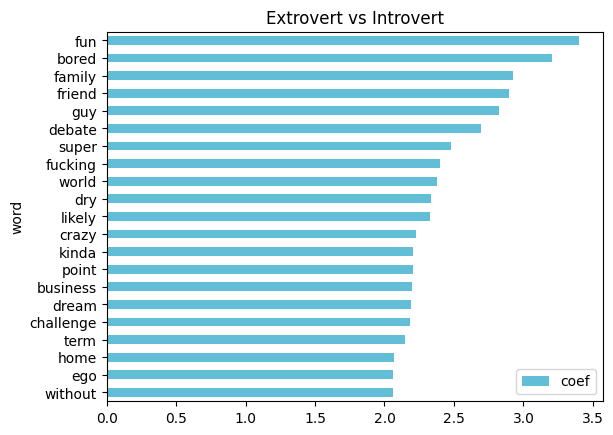

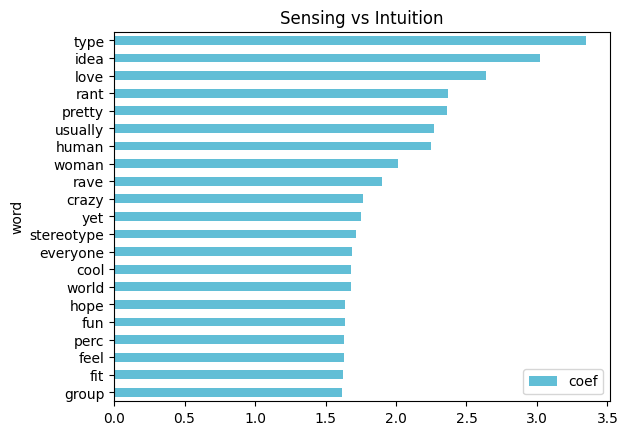

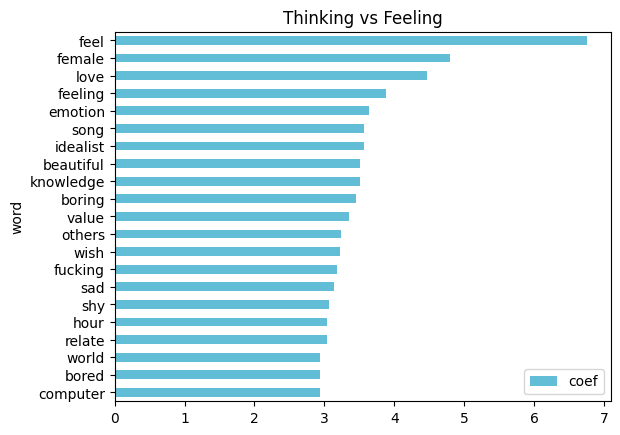

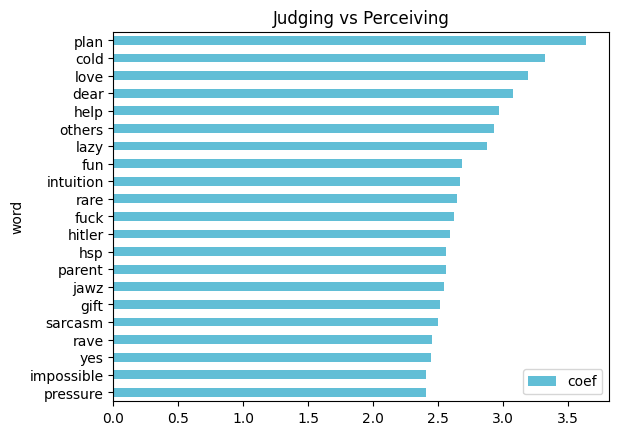

In [46]:
#Final Model - Logistic Regression with TF-IDF Vectorization
#Selecting TF-IDF Logistic Regression as our final model as it returned the highest scores for all metrics - accuracy, precision, recall, roc-auc, avg_precision_recall as compared to other models.


for col in y.columns:
    
    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocesser_tf,
        RandomUnderSampler(),
        LogisticRegressionCV()
    )
    
    # training the data on entire dataset
    tfidf_logistic_regression.fit(X, target)
    
    # feature importance   
    coef = tfidf_logistic_regression[-1].coef_[0]  
    word = tfidf_logistic_regression[0].named_transformers_["tfidf"].get_feature_names_out()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])
  
    # saving the model
    dump(tfidf_logistic_regression, f"clf_{col}.joblib")